<a href="https://colab.research.google.com/github/techllen/Ames_Housing_Analytics/blob/main/ames_housing_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA

In [ ]:
# 1.It contains various features and attributes of residential homes in Ames, Iowa, USA.
# Here - https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
# feature documentation https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf

# My Goal is to determine different attributes of the house that Influence its price group

# Price groups are distributed into two groups,
# higher prices greater than medium 1
# lower than medium price 0

In [ ]:
#2.Data Cleaning and Preprocessing:

import pandas as pd #tabular data
import numpy as np #arrays
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [ ]:
# 1.Loading Datasets
# superstore_sales_data = pd.read_excel('/content/datasets/Superstore.xlsx')
ames_housing_data = pd.read_csv('/content/drive/MyDrive/AI_ML/datasets/AmesHousing.csv', encoding='ISO-8859-1') # or encoding='ISO-8859-1'
# ames_housing_data.head(4)


In [ ]:
# 2. Stats about the data
#descriptive stats on the data
# ames_housing_data.describe()

# Structure of the dataset
# ames_housing_data.info()

#checking for missing values
missing_values_series = ames_housing_data.isnull().sum()

greater_than_zero_mask = missing_values_series > 0

filtered_missing_values_series = missing_values_series[ greater_than_zero_mask ]

# print(filtered_missing_values_series)

In [ ]:
# 3. Data Cleaning
# 3.1 Handling missing value
# RULE OF THUMB
# if missing values count is > 70% of the data delete the attribute

# Checking 70% missing values
total_number_of_records = ames_housing_data.shape[0]

# Convert the series to a DataFrame and rename the columns
filtered_missing_values_df = filtered_missing_values_series.to_frame(name='number_of_missing_values')
filtered_missing_values_df.index.name = 'column_name'
filtered_missing_values_df = filtered_missing_values_df.reset_index()

filtered_missing_values_df['missing_values_percentage'] = (filtered_missing_values_df['number_of_missing_values'] / total_number_of_records) * 100

# filtered_missing_values_df

# Get the names of the columns to drop
dropping_off_condition = filtered_missing_values_df['missing_values_percentage'] > 70
filtered_missing_values_df_columns_to_drop = filtered_missing_values_df[dropping_off_condition]
# filtered_missing_values_df_columns_to_drop

columns_to_drop = filtered_missing_values_df_columns_to_drop['column_name'].tolist()

# Dropping off columns with missing values > 70%
ames_housing_data = ames_housing_data.drop(columns=columns_to_drop)
# ames_housing_data.info()

# Data imputation
categorical_columns = ames_housing_data.select_dtypes(include=['object']).columns
categorical_columns
int_columns = ames_housing_data.select_dtypes(include=['int64']).columns
float_columns = ames_housing_data.select_dtypes(include=['float64']).columns
numerical_columns = int_columns.append(float_columns)
# numerical_columns

replace_mean_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].median(),inplace=True)
replace_mode_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].mode()[0],inplace=True)

for col in numerical_columns:
  replace_mean_lambda(col)

for col in categorical_columns:
  replace_mode_lambda(col)

# print("-----------cleaned and imputated data--------------")
# ames_housing_data.info()

#3.2 Data type conversion
#Getting categorical calumns
# Get all columns of type 'object' (string)
object_columns = ames_housing_data.select_dtypes(include=['object']).columns
for col in object_columns:
    ames_housing_data[col]=ames_housing_data[col].astype('category')


#3.3 removing duplicates
duplicates = ames_housing_data.duplicated().sum()
if duplicates > 0:
    ames_housing_data = ames_housing_data.drop_duplicates()

<ipython-input-56-05411c2c5392>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  replace_mean_lambda = lambda col_name: ames_housing_data[col_name].fillna(ames_housing_data[col_name].median(),inplace=True)
<ipython-input-56-05411c2c5392>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
#4.Outlier Detection

# Visualizing outliers in 'Price' before treatment
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=ames_housing_data['SalePrice'])
# plt.title('Sale Price Outliers (Before Treatment)')
# plt.xlabel('SalePrice')
# plt.show()

# Identifying outliers using the IQR method

# Calculating IQR for 'Fare'
Q1 = ames_housing_data['SalePrice'].quantile(0.25)
Q3 = ames_housing_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_outliers = ames_housing_data[(ames_housing_data['SalePrice'] < lower_bound) | (ames_housing_data['SalePrice'] > upper_bound)]
# print(f"Number of fare outliers: {len(price_outliers)}")

# 4.1 Handling Outliers for sale price
# capping will be used - to avoid losing data
# Treating Year Built outliers by capping
ames_housing_data['SalePrice'] = ames_housing_data['SalePrice'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualizing outliers in 'Fare' after treatment
# plt.figure(figsize=(6, 3))
# sns.boxplot(x=ames_housing_data['SalePrice'])
# plt.title('SalePrice Outliers (After Treatment)')
# plt.xlabel('SalePrice')
# plt.show()

print("\n-----------data after type conversion and dealing with outliers--------------")
ames_housing_data.head(5)


-----------data after type conversion and dealing with outliers--------------


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000.0
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000.0
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000.0
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000.0
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900.0


In [ ]:
# 5.Feature Engineering
# 5.1 Creating New Features

# Age_of_the_house = (Yr Sold  - Year Built )

ames_housing_data['Age_of_the_house'] = ames_housing_data['Yr Sold'] - ames_housing_data['Year Built']

# Is_Price_High , higher prices greater than median SalePrice 1 ,lower than median SalePrice 0

median_sale_price =  ames_housing_data['SalePrice'].median()

print(f'\n\n Med Price is: {median_sale_price} \n')

ames_housing_data['Is_Price_High'] = ames_housing_data['SalePrice'].apply(lambda price: 1 if price > median_sale_price else 0)

ames_housing_data.head(15)



 Med Price is: 160000.0 



,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Age_of_the_house,Is_Price_High
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,5,2010,WD,Normal,215000.0,50,1
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,120,0,0,6,2010,WD,Normal,105000.0,49,0
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,12500,6,2010,WD,Normal,172000.0,52,1
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,Normal,244000.0,42,1
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,Normal,189900.0,13,1
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,6,2010,WD,Normal,195500.0,12,1
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,Normal,213500.0,9,1
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,144,0,0,1,2010,WD,Normal,191500.0,18,1
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,Normal,236500.0,15,1
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,6,2010,WD,Normal,189000.0,11,1


In [ ]:
# Observation
# ames_housing_data['Overall Qual'].describe()

ames_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Order             2930 non-null   int64   
 1   PID               2930 non-null   int64   
 2   MS SubClass       2930 non-null   int64   
 3   MS Zoning         2930 non-null   category
 4   Lot Frontage      2930 non-null   float64 
 5   Lot Area          2930 non-null   int64   
 6   Street            2930 non-null   category
 7   Lot Shape         2930 non-null   category
 8   Land Contour      2930 non-null   category
 9   Utilities         2930 non-null   category
 10  Lot Config        2930 non-null   category
 11  Land Slope        2930 non-null   category
 12  Neighborhood      2930 non-null   category
 13  Condition 1       2930 non-null   category
 14  Condition 2       2930 non-null   category
 15  Bldg Type         2930 non-null   category
 16  House Style       2930 n

In [ ]:
# LOGISTIC REGRESSION

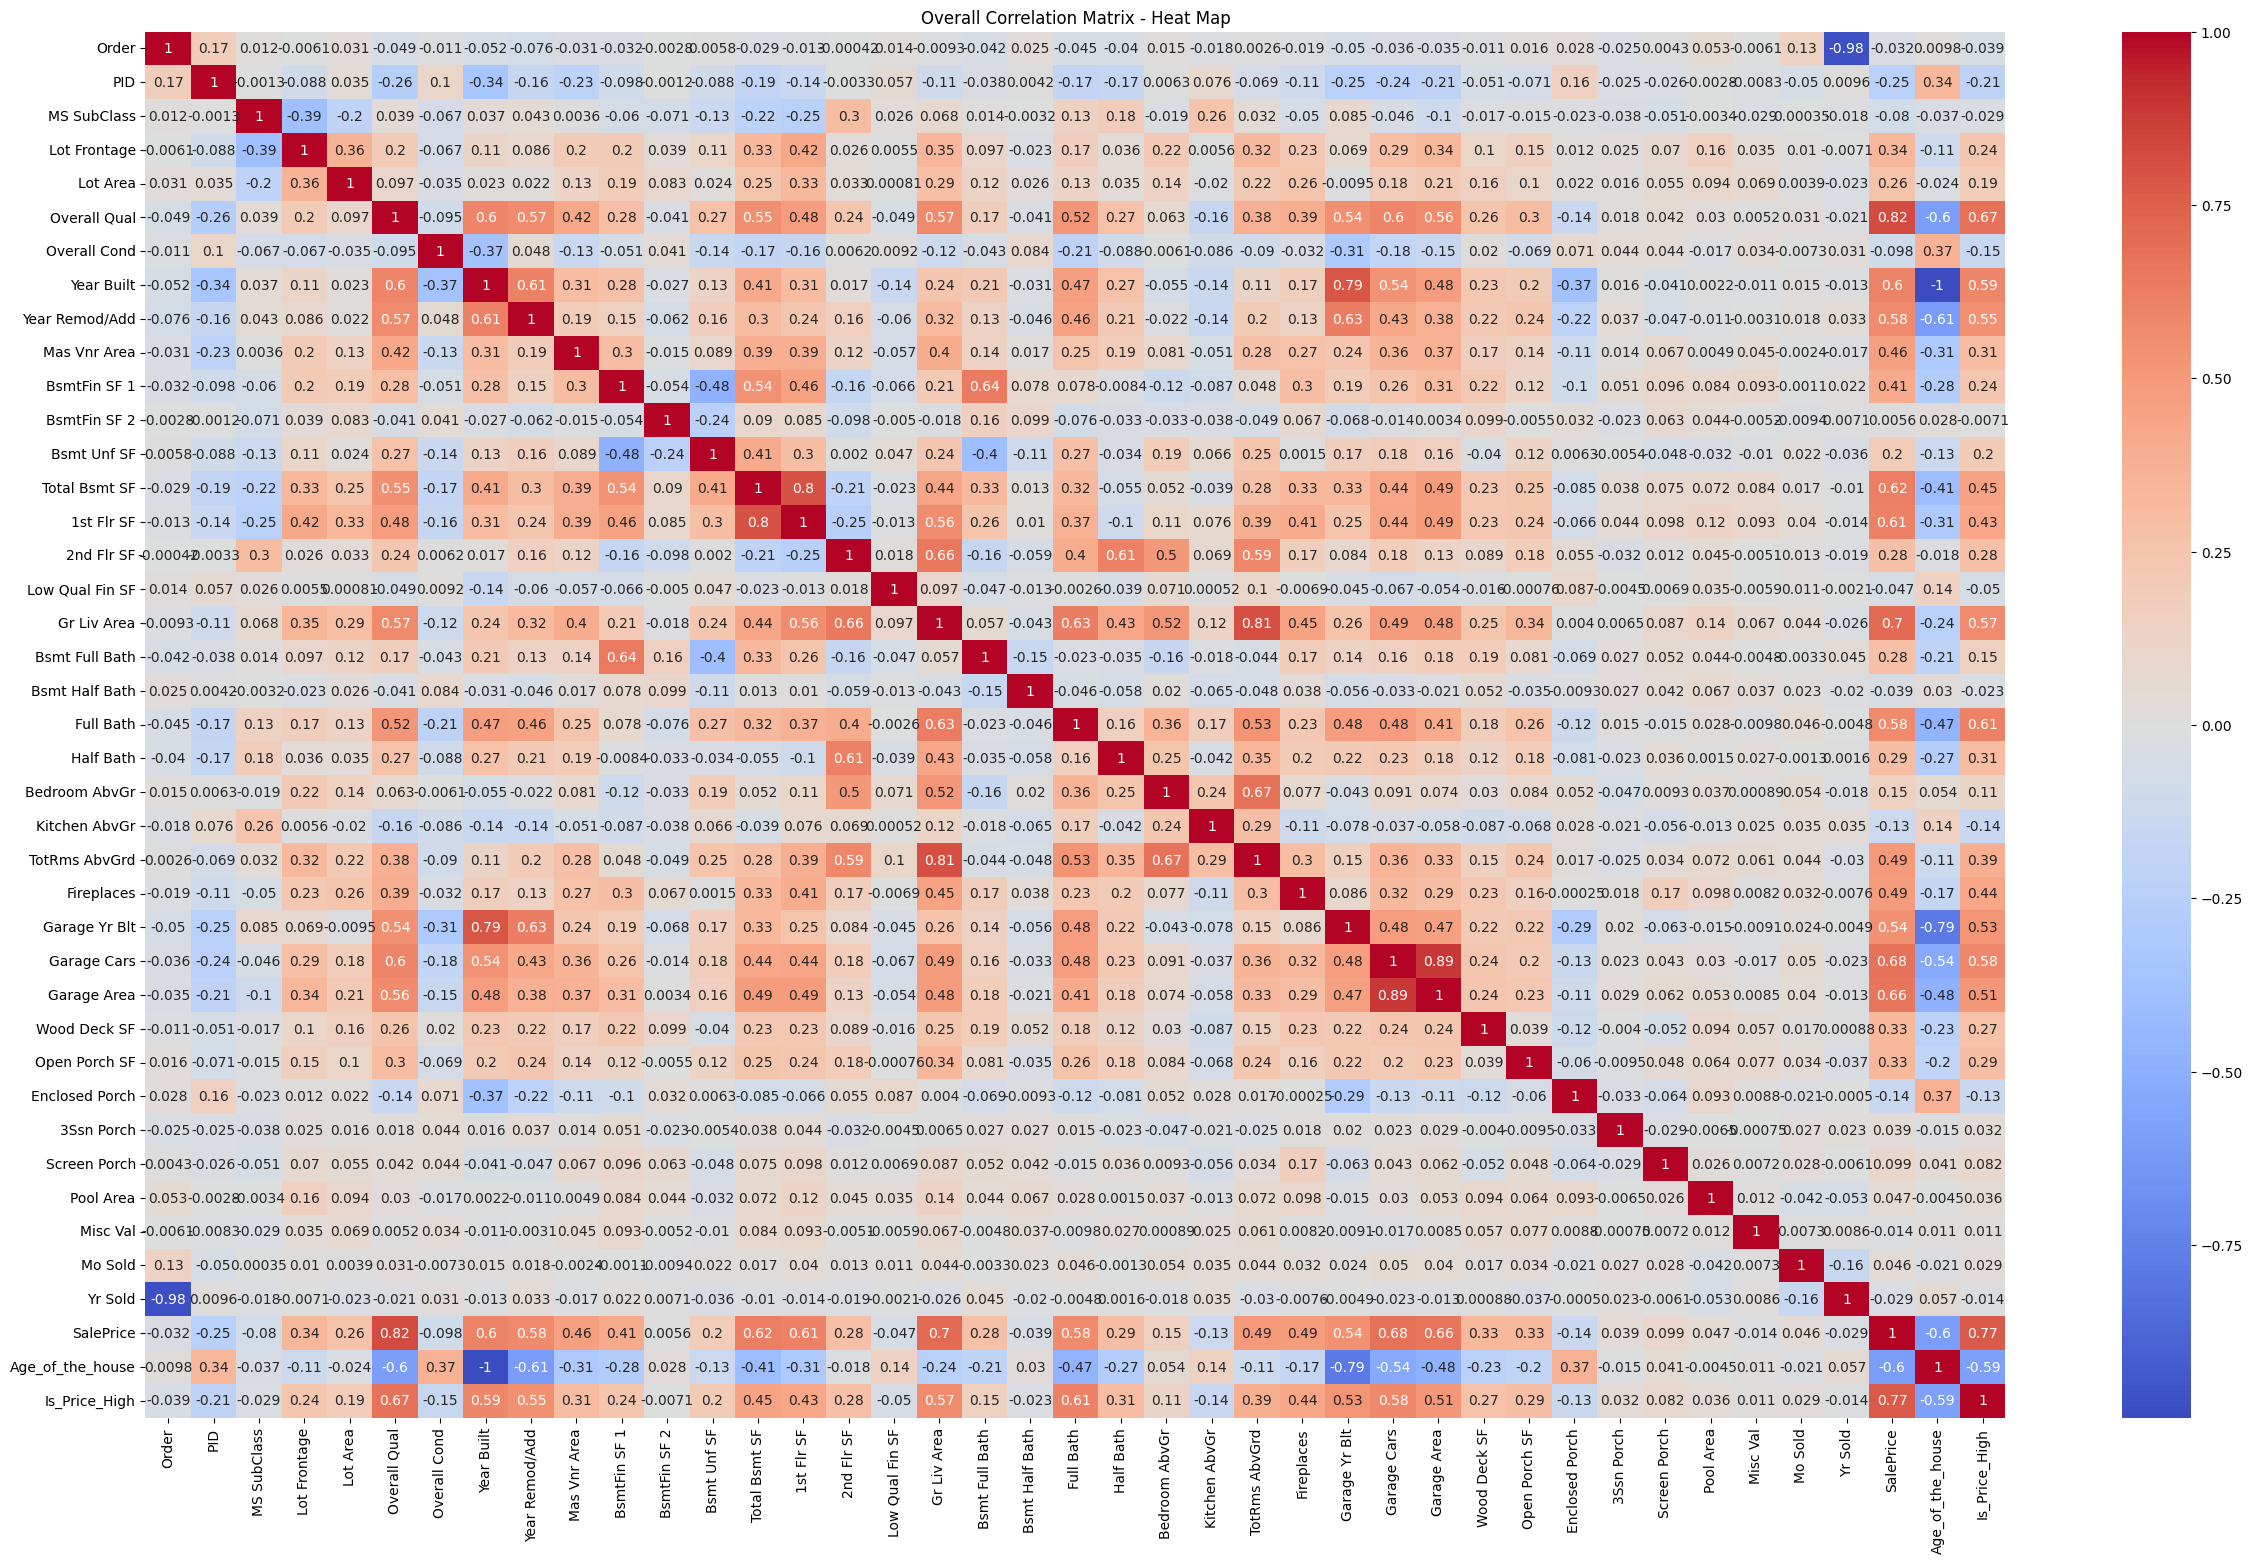

In [ ]:
# 6.Select features and target variable for classification
# 6.1 Let's find out whether the variables(numerical columns) are correlated with the target variable

# Corrrelation matrix - Heat Map
plt.figure(figsize=(30,18))

# Select only numerical columns for correlation matrix
numerical_cols = ames_housing_data.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Overall Correlation Matrix - Heat Map')
plt.show()

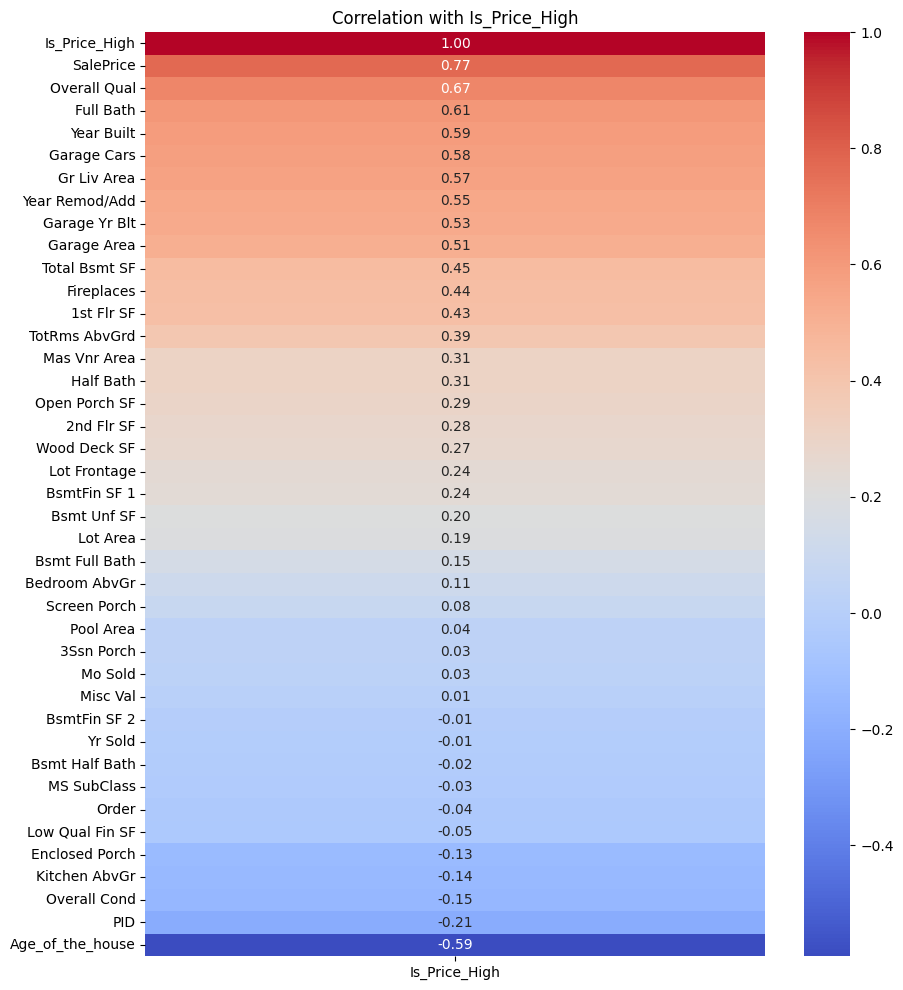

In [ ]:
# 6.2 Select only numerical columns as variables and Is_Price_High as target variable for correlation matrix
numerical_cols = ames_housing_data.select_dtypes(include=[np.number])

# a).Focus on the Target Variable

# Correlation with target variable
target_corr = numerical_cols.corr()['Is_Price_High'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Is_Price_High')
plt.show()

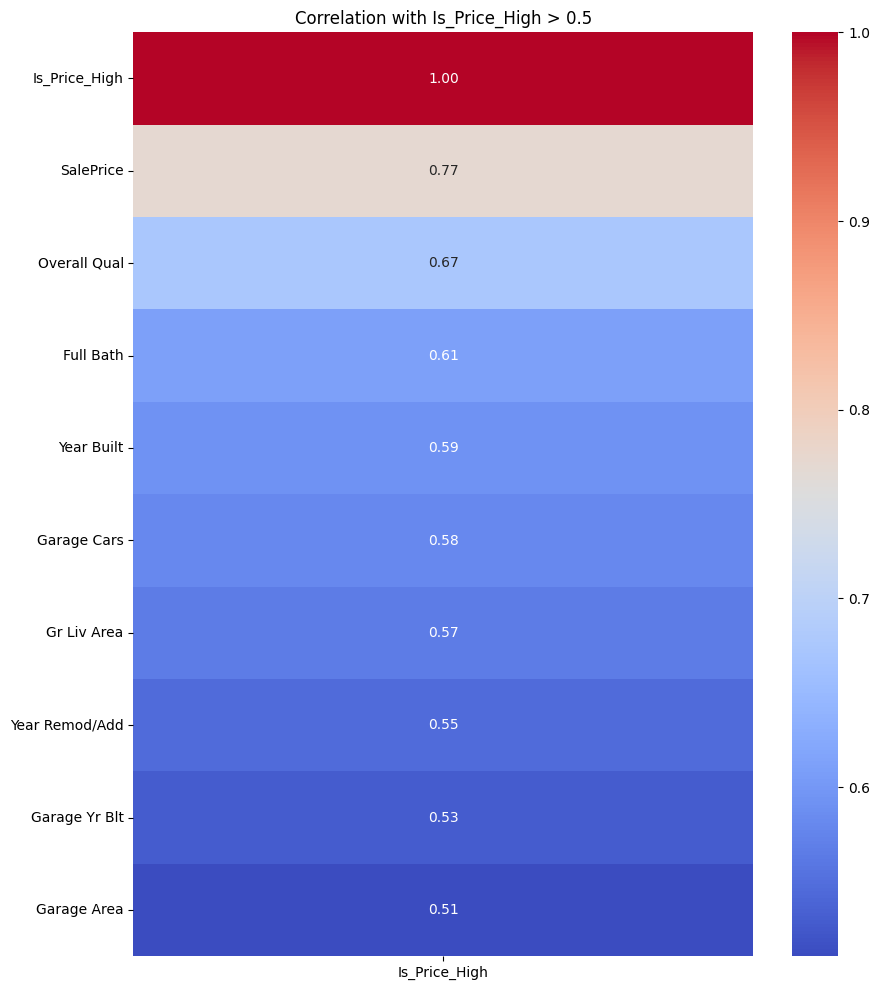



['SalePrice', 'Overall Qual', 'Full Bath', 'Year Built', 'Garage Cars', 'Gr Liv Area', 'Year Remod/Add', 'Garage Yr Blt', 'Garage Area']


In [ ]:
# b)Filtering Highly Correlated Variables ,correlation threshhold is 0.5

# Set correlation threshold
corr_threshold = 0.5

# Correlation with target variable
target_corr = numerical_cols.corr()['Is_Price_High'].sort_values(ascending=False)

target_corr = target_corr[target_corr > corr_threshold]

# getting columns with corr > 0.5
selected_features = target_corr.index.tolist()[1:]

# Plotting
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Is_Price_High > 0.5')
plt.show()

print(f'\n\n{selected_features}')

In [ ]:
# c) Observation for Select features and target variable for classification
features = selected_features
target = 'Is_Price_High'

# Split the data into features (X) and target (y)
X = ames_housing_data[features]
y = ames_housing_data[target]

# Display the first 5 rows of the features data
X.head()

,SalePrice,Overall Qual,Full Bath,Year Built,Garage Cars,Gr Liv Area,Year Remod/Add,Garage Yr Blt,Garage Area
0,215000.0,6,1,1960,2.0,1656,1960,1960.0,528.0
1,105000.0,5,1,1961,1.0,896,1961,1961.0,730.0
2,172000.0,6,1,1958,1.0,1329,1958,1958.0,312.0
3,244000.0,7,2,1968,2.0,2110,1968,1968.0,522.0
4,189900.0,5,2,1997,2.0,1629,1998,1997.0,482.0


In [ ]:
y.head()

,Is_Price_High
0,1
1,0
2,1
3,1
4,1


In [ ]:
# 6.3 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared data
print("Training features:\n", X_train[:5])
print("Training target:\n", y_train[:5])
print("Testing features:\n", X_test[:5])
print("Testing target:\n", y_test[:5])

Training features:
 [[-0.36942621  0.64157138  0.7840283   0.15356004  0.3065895  -0.25659802
  -0.3963495  -0.08780471  0.02873761]
 [ 0.11661665 -0.7760788   0.7840283  -0.14405706  0.3065895   1.23917992
  -0.82786498 -0.45038069  0.30319045]
 [-1.10880049 -1.48490389  0.7840283  -0.30939988  0.3065895  -0.54546519
  -1.0675958  -0.6518118  -0.05034202]
 [-1.28259763 -1.48490389  0.7840283  -0.73929124  0.3065895  -0.90951697
  -1.64294977 -0.89352912 -0.24571523]
 [-1.21558263 -1.48490389  0.7840283  -1.69827964 -2.32388554  0.39829946
  -1.64294977  0.03305395 -2.1994473 ]]
Training target:
 381     0
834     1
1898    0
678     0
700     0
Name: Is_Price_High, dtype: int64
Testing features:
 [[-0.23686907  1.35039647 -1.02479289 -1.53293681 -1.00864802  0.32905048
   0.56257378 -2.14240195 -1.13884989]
 [-0.89965477 -0.06725371 -1.02479289  0.02128577 -1.00864802 -0.92930239
  -0.58813416 -0.20866337 -0.97138714]
 [ 0.28599522  0.64157138  0.7840283   1.04641131  0.3065895   0.44

In [ ]:
# 7.Implementing Logistic Regression
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 7.1
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
# 7.2 Evaluate the model , confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy of Logistic Regression model: 0.984641638225256
Confusion Matrix:
 [[278   3]
 [  6 299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       281
           1       0.99      0.98      0.99       305

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586

